# PhysRevA.96.022128 - Figure 6

Positron number scaling law

Black line is equation 24

Blue line is the integral $P_\pm ~dN_\gamma/dw$ (without saddle-point approximation)

In [2]:
# import API
import pwpp
from pwpp import *

In [3]:
xdim = 10

# tau
E0 = 1; #[GeV]
I21 = 5; #[]
lbd = 1; #[\mu m]
taulst = np.logspace(log10(5),log10(100),xdim);
def fun(tau): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
fun = np.vectorize(fun)
sadle_tau = fun(taulst)
def fun(n): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,n,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,n,w), 0.01,E0)[0]
fun = np.vectorize(fun)
full_tau = fun(taulst*c/(lbd*1e-6)*1e-15)

# lbd
E0 = 1; #[GeV]
I21 = 5; #[]
tau = 30; #[fs]
lbdlst = np.logspace(log10(0.1),log10(20),xdim);
def fun(lbd): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
fun = np.vectorize(fun)
saddle_lbd = fun(lbdlst)
def fun(lbd): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w),0.01,E0)[0];
fun = np.vectorize(fun)
full_lbd = fun(lbdlst)

# I21
E0 = 1; #[GeV]
tau = 30; #[fs]
lbd = 1; #[\mu m]
I21lst = np.logspace(log10(1),log10(40),xdim);
def fun(I21): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
fun = np.vectorize(fun)
saddle_I21 = fun(I21lst)
def fun(I21): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w),0.01,E0)[0];
fun = np.vectorize(fun)
full_I21 = fun(I21lst)

# E0
I21 = 5;
tau = 30; #[fs]
lbd = 1; #[\mu m]
E0lst = np.logspace(log10(0.5),log10(4),xdim);
def fun(E0): return Np(E0/m, 0.855*sqrt(I21*1e21/1e18)*lbd, 2*pi*c/(lbd*1e-6)*hbar/e*1e-9, tau*c/(lbd*1e-6)*1e-15);
fun = np.vectorize(fun)
saddle_E0 = fun(E0lst)
def fun(E0): return integrate.quad(lambda w: ppm(0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w) * dNgdw(E0/m,0.855*sqrt(I21*1e21/1e18)*lbd,2*pi*c/(lbd*1e-6)*hbar/e*1e-9,tau*c/(lbd*1e-6)*1e-15,w),0.01,E0)[0];
fun = np.vectorize(fun)
full_E0 = fun(E0lst)

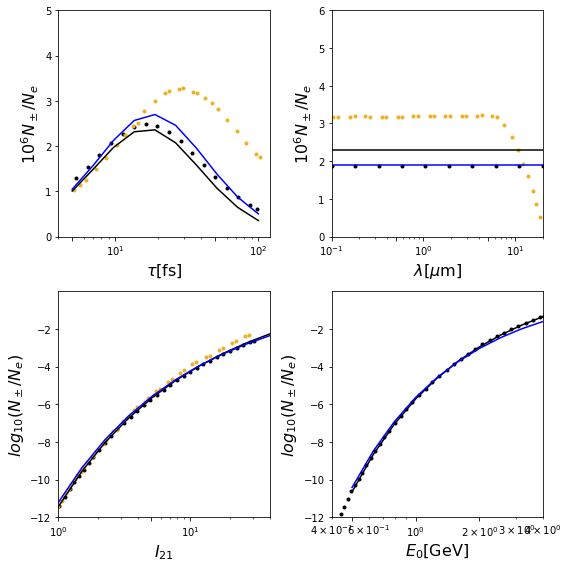

In [8]:
# plot all
fntsz = 16
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,8))

axes[0,0].set_xscale('log')
axes[0,1].set_xscale('log')
axes[1,0].set_xscale('log')
axes[1,1].set_xscale('log')

f = open('data/fig6a/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0,0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k.')
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0,0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'.',color='#EDB120')
#
f = open('data/fig6b/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0,1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'.',color='#EDB120')
#
f = open('data/fig6c/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1,0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k.')
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1,0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'.',color='#EDB120')
#
f = open('data/fig6d/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1,1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k.')


axes[0,0].plot(taulst,1e6*sadle_tau,'k-')
axes[0,0].plot(taulst,1e6*full_tau,'b-')
axes[0,0].set_xlim([4,120])
axes[0,0].set_ylim([0,5])
axes[0,0].set_xlabel(r'$\tau[\mathrm{fs}]$',size=fntsz)
axes[0,0].set_ylabel(r'$10^6 N_\pm /N_e$',size=fntsz)
axes[0,0].set_xticks([5,10,50,100])
axes[0,0].set_yticks([0,1,2,3,4,5])

axes[0,1].plot(lbdlst, lbdlst*0+1.8735083532219514,'k.')
axes[0,1].plot(lbdlst,1e6*saddle_lbd,'b-')
axes[0,1].plot(lbdlst,1e6*full_lbd,'k-')
axes[0,1].set_xlim([0.1,20])
axes[0,1].set_ylim([0,5])
axes[0,1].set_xlabel(r'$\lambda[\mu \mathrm{m}]$',size=fntsz)
axes[0,1].set_ylabel(r'$10^6 N_\pm /N_e$',size=fntsz)
axes[0,1].set_xticks([0.1,0.5,1,5,10])
axes[0,1].set_yticks([0,1,2,3,4,5,6])

axes[1,0].plot(I21lst,log10(saddle_I21),'k-')
axes[1,0].plot(I21lst,log10(full_I21),'b-')
axes[1,0].set_xlim([1,40])
axes[1,0].set_ylim([-12,0])
axes[1,0].set_xlabel(r'$I_{21}$',size=fntsz)
axes[1,0].set_ylabel(r'$log_{10}(N_\pm /N_e)$',size=fntsz)
axes[1,0].set_xticks([1,5,10])
axes[1,0].set_yticks([-12,-10,-8,-6,-4,-2])

axes[1,1].plot(E0lst,log10(saddle_E0),'k-')
axes[1,1].plot(E0lst,log10(full_E0),'b-')
axes[1,1].set_xlim([0.4,4])
axes[1,1].set_ylim([-12,0])
axes[1,1].set_xlabel(r'$E_{0}[\mathrm{GeV}]$',size=fntsz)
axes[1,1].set_ylabel(r'$log_{10}(N_\pm /N_e)$',size=fntsz)
axes[1,1].set_xticks([0.5,1,2])
axes[1,1].set_yticks([-12,-10,-8,-6,-4,-2])

plt.tight_layout()
plt.show()